<a href="https://colab.research.google.com/github/PrinceShamim022/Fisheries_DataAnalysis_Projects/blob/main/K_means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## K-means Clustering From Scratch In Python
Abdullah Al Shamim

Github, https://github.com/PrinceShamim022/Fisheries_DataAnalysis_Projects

In this Jupyter notebook, we will build K-means Clustering models From Scratch In Python.

---



In [1]:

import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("/clam.csv")

In [5]:
df.head()

,SL..NO.,Month,Color,Deform,Trt,SL,SH,SW,LL,PL,...,UL,LCT,LPAS,PW,AW,PVM,PS,CT..RIGHT.TEETH.,Total.wt,muscle.wt
0,1,January,A1,NaN,1,41.47,33.00,22.63,8.01,34.06,...,32.25,24.30,24.41,7.83,4.47,7.29,7.68,5.18,24.50,5.72
1,2,January,A2,NaN,1,39.85,31.55,21.40,9.94,31.82,...,29.02,18.62,21.62,6.71,4.77,8.15,7.11,6.45,22.37,4.60
2,3,January,A3,NaN,1,39.48,33.25,22.92,9.83,32.86,...,29.87,17.27,22.61,6.17,5.01,6.76,8.26,7.38,22.22,4.09
3,4,January,A4,NaN,1,41.09,35.11,22.71,10.52,34.16,...,32.35,15.56,22.86,7.61,4.47,8.50,6.53,6.52,24.40,4.17
4,5,January,A5,NaN,1,35.13,29.42,20.18,9.51,27.69,...,28.06,15.21,18.84,7.51,4.42,7.22,7.00,6.00,20.03,2.87


In [6]:
df.columns

Index(['SL..NO.', 'Month', 'Color', 'Deform', 'Trt', 'SL', 'SH', 'SW', 'LL',
       'PL', 'AL', 'UL', 'LCT', 'LPAS', 'PW', 'AW', 'PVM', 'PS',
       'CT..RIGHT.TEETH.', 'Total.wt', 'muscle.wt'],
      dtype='object')

In [9]:
features = ['SL', 'SH', 'SW', 'LL',
       'PL', 'AL', 'UL', 'LCT', 'LPAS', 'PW', 'AW', 'PVM', 'PS',
       'CT..RIGHT.TEETH.']

In [10]:
df = df.dropna(subset = features)

In [11]:
data = df[features].copy()

In [12]:
data

,SL,SH,SW,LL,PL,AL,UL,LCT,LPAS,PW,AW,PVM,PS,CT..RIGHT.TEETH.
0,41.47,33.00,22.63,8.01,34.06,24.97,32.25,24.30,24.41,7.83,4.47,7.29,7.68,5.18
1,39.85,31.55,21.40,9.94,31.82,24.01,29.02,18.62,21.62,6.71,4.77,8.15,7.11,6.45
2,39.48,33.25,22.92,9.83,32.86,25.63,29.87,17.27,22.61,6.17,5.01,6.76,8.26,7.38
3,41.09,35.11,22.71,10.52,34.16,26.59,32.35,15.56,22.86,7.61,4.47,8.50,6.53,6.52
4,35.13,29.42,20.18,9.51,27.69,22.84,28.06,15.21,18.84,7.51,4.42,7.22,7.00,6.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,32.78,25.62,16.03,6.57,23.86,17.69,23.68,14.46,20.70,4.76,3.20,6.03,4.64,2.21
2289,27.92,21.76,14.90,6.15,20.10,14.61,19.35,11.83,18.49,3.62,2.71,4.90,4.79,3.01
2290,31.44,26.66,16.67,7.43,23.89,17.60,24.43,13.16,19.43,5.29,4.08,6.32,5.17,4.29
2291,31.15,23.43,13.99,5.95,21.66,15.48,21.65,13.09,18.74,4.23,3.40,6.49,5.13,4.01


# Pseudocode

##High level
1.Scale data to standardize values
2. Initialize random centroids
3. Get labels for each data point
4. Create new centroids
5. Plot the centroids
6. Repeat 3-5 until the centroids stop changing

In [13]:
data = ((data - data.min()) / (data.max() - data.min())) * 10 + 1

In [14]:
data.describe()

,SL,SH,SW,LL,PL,AL,UL,LCT,LPAS,PW,AW,PVM,PS,CT..RIGHT.TEETH.
count,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000
mean,6.579696,6.085366,5.653121,5.616032,6.784332,5.817224,6.648856,5.908047,6.407635,5.593852,5.681265,6.409980,5.987821,5.849132
std,1.996480,1.773638,1.691880,1.745128,1.767486,1.864052,1.776546,1.704224,1.761626,1.829864,1.792442,1.805292,1.758335,1.727567
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.855422,4.502415,4.166297,4.165992,5.271487,4.187623,5.137432,4.562210,5.056366,4.119777,4.284211,4.986111,4.652893,4.502747
50%,6.858864,6.341615,5.940133,5.623482,7.071560,6.063851,6.826401,5.873516,6.374937,5.623955,5.715789,6.569444,6.057851,5.601648
75%,8.115318,7.432022,6.875831,6.935223,8.130210,7.291749,8.034358,7.133196,7.779064,6.961003,7.000000,7.680556,7.297521,7.112637
max,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000


In [15]:
data.head()

,SL,SH,SW,LL,PL,AL,UL,LCT,LPAS,PW,AW,PVM,PS,CT..RIGHT.TEETH.
0,8.015491,6.904072,6.432373,5.064777,8.650314,7.733792,8.128391,9.678369,7.779064,8.116992,6.305263,6.750000,9.314050,6.480769
1,7.457831,6.403727,5.886918,6.627530,7.824050,7.262279,6.960217,6.745999,6.374937,6.557103,6.936842,7.944444,8.371901,8.225275
2,7.330465,6.990338,6.560976,6.538462,8.207672,8.057957,7.267631,6.049045,6.873176,5.805014,7.442105,6.013889,10.272727,9.502747
3,7.884682,7.632160,6.467849,7.097166,8.687200,8.529470,8.164557,5.166236,6.998993,7.810585,6.305263,8.430556,7.413223,8.321429
4,5.833046,5.668737,5.345898,6.279352,6.300627,6.687623,6.613020,4.985545,4.975843,7.671309,6.200000,6.652778,8.190083,7.607143


In [16]:
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [17]:
centroids = random_centroids(data, 5)

In [18]:
centroids

,0,1,2,3,4
SL,8.349398,5.213425,4.858864,9.912220,4.401033
SH,9.157350,4.271222,8.356798,5.137336,8.408558
SW,2.689579,7.168514,8.325942,7.439024,8.299335
LL,4.441296,3.396761,7.461538,6.214575,5.874494
PL,8.192918,7.034674,7.090004,6.466617,6.632608
AL,5.774067,6.982318,6.938114,3.504912,2.910609
UL,8.819168,5.734177,7.249548,7.350814,7.972875
LCT,6.900878,5.945792,7.050594,4.794528,3.576149
LPAS,8.010569,7.643181,3.908908,8.639658,8.830901
PW,4.231198,2.253482,6.403900,6.529248,6.584958


In [19]:
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [20]:
labels = get_labels(data, centroids)

In [21]:
labels.value_counts()

1    905
2    849
3    440
0     81
4     18
dtype: int64

In [22]:
def new_centroids(data, labels, k):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

In [23]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [24]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

In [25]:
max_iterations = 100
centroid_count = 3

In [26]:
centroids = random_centroids(data, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

In [27]:
while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids

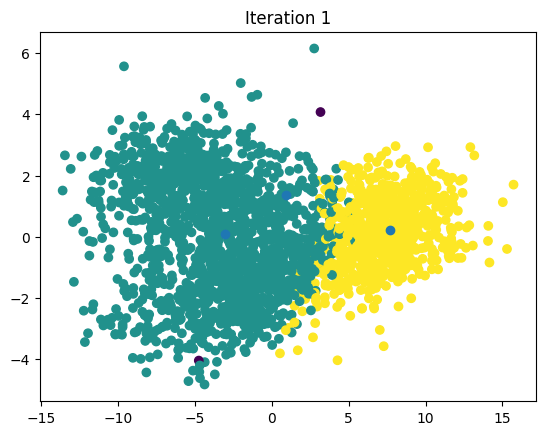

In [28]:
    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, centroid_count)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1

In [36]:
plt.savefig("K Means Cluster.png", format="png", dpi=300)

<Figure size 640x480 with 0 Axes>

In [29]:
centroids

,0,1,2
SL,7.795008,7.623070,4.087881
SH,7.345018,7.010618,3.893704
SW,7.168375,6.534639,3.550170
LL,7.271962,6.360883,3.667372
PL,8.183197,7.718002,4.590695
AL,7.853841,6.741565,3.551237
UL,8.265629,7.568238,4.476752
LCT,1.470235,6.671124,3.999759
LPAS,3.173769,7.178138,4.441860
PW,4.239794,6.395146,3.508789


In [30]:
labels.value_counts()

1    1550
2     741
0       2
dtype: int64

In [31]:
df[labels == 0][["Trt"] + features]

,Trt,SL,SH,SW,LL,PL,AL,UL,LCT,LPAS,PW,AW,PVM,PS,CT..RIGHT.TEETH.
94,5,39.78,32.98,25.22,11.15,32.55,23.23,31.39,7.49,22.54,7.95,5.43,9.16,7.46,6.77
1172,1,41.93,35.66,23.41,10.34,33.04,27.48,33.94,9.74,11.88,3.56,2.40,4.26,2.97,2.03


In [32]:
from sklearn.cluster import KMeans

In [33]:
kmeans = KMeans(3)
kmeans.fit(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [34]:
KMeans(n_clusters=3)

KMeans(n_clusters=3)

In [35]:
pd.DataFrame(kmeans.cluster_centers_, columns=features).T

,0,1,2
SL,4.162079,8.715700,6.815078
SH,3.940749,8.006269,6.271001
SW,3.602756,7.418996,5.893275
LL,3.714055,7.398729,5.710429
PL,4.645854,8.614782,7.044849
AL,3.600507,7.779747,6.029481
UL,4.530058,8.586419,6.796941
LCT,4.072518,7.718574,5.919157
LPAS,4.567890,8.219368,6.421392
PW,3.589211,7.482785,5.684460
